## データの読み込み

まずデータを読み込み、各テーブルの関係性や大枠を掴むのが重要

In [1]:
import pandas as pd

In [2]:
campaign = pd.read_csv("campaign_master.csv")
campaign

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [3]:
class_ = pd.read_csv("class_master.csv")
class_

,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [4]:
customer = pd.read_csv("customer_master.csv")
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


In [5]:
use_log = pd.read_csv("use_log.csv")
use_log

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


## データ整形

データ間の関係を見出したら、主となるデータを見つけ、  
それを中心に整形していく

In [6]:
# left join
customer_join = pd.merge(customer,campaign,on="campaign_id",how="left")
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,通常
...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,通常
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,通常
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,通常
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,通常


In [7]:
# left join
customer_join = pd.merge(customer_join,class_,on="class",how="left")
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,通常,ナイト,6000
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,通常,オールタイム,10500
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,通常,オールタイム,10500
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,通常,ナイト,6000
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,通常,オールタイム,10500


In [8]:
# 結合後は必ず欠損値がないか確認
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
campaign_name       0
class_name          0
price               0
dtype: int64

## 基礎集計
各属性ごとにグルーピングして特徴を掴む

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# グラフ描画で日本語表示のための設定
font = {'family' : 'MS Gothic'}
plt.rc('font', **font)

<AxesSubplot:xlabel='class_name'>

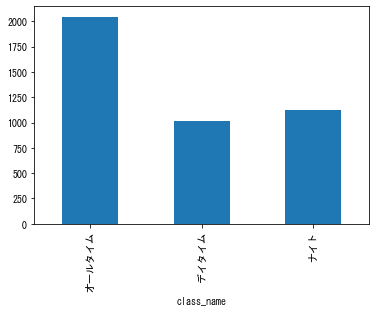

In [10]:
# class_nameの取り得る値毎にグルーピングし、数を数える
customer_join.groupby("class_name").count()["customer_id"].plot(kind="bar")

<AxesSubplot:xlabel='campaign_name'>

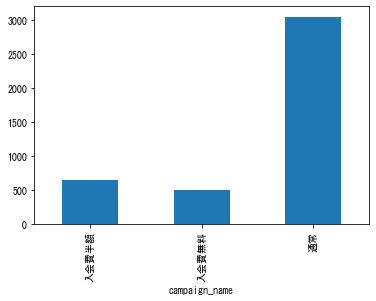

In [11]:
customer_join.groupby("campaign_name").count()["customer_id"].plot(kind="bar")

<AxesSubplot:xlabel='gender'>

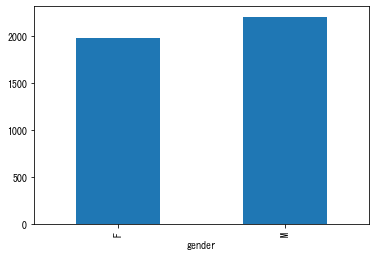

In [12]:
customer_join.groupby("gender").count()["customer_id"].plot(kind="bar")

<AxesSubplot:xlabel='is_deleted'>

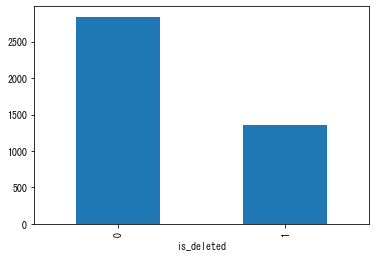

In [13]:
customer_join.groupby("is_deleted").count()["customer_id"].plot(kind="bar")

In [14]:
customer_join["start_month_str"] = pd.to_datetime(customer_join["start_date"])
customer_join["start_month_str"] = customer_join["start_month_str"].dt.strftime("%Y%m")
customer_join["start_month_str"]

0       201505
1       201505
2       201505
3       201505
4       201505
         ...  
4187    201903
4188    201903
4189    201903
4190    201903
4191    201903
Name: start_month_str, Length: 4192, dtype: object

<AxesSubplot:xlabel='start_month_str'>

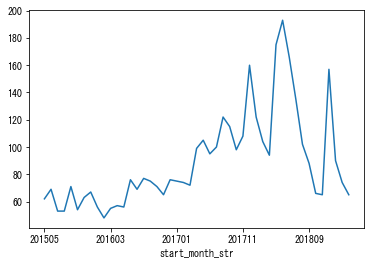

In [15]:
customer_join.groupby("start_month_str").count()["customer_id"].plot()

## 特定の属性を持つ値を集計

In [16]:
# 非退会者を抽出
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[ (customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna()) ]
customer_newer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,start_month_str
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,通常,ナイト,6000,201505
...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,通常,ナイト,6000,201903
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903


<AxesSubplot:xlabel='class_name'>

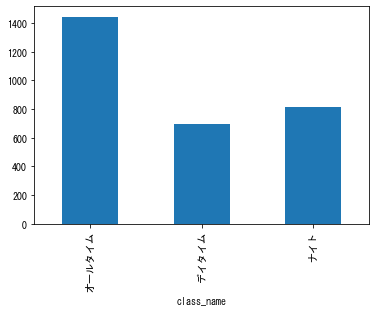

In [17]:
customer_newer.groupby("class_name").count()["customer_id"].plot(kind="bar")

<AxesSubplot:xlabel='campaign_name'>

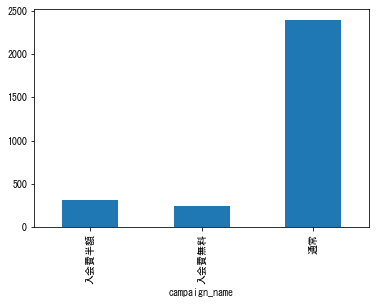

In [18]:
customer_newer.groupby("campaign_name").count()["customer_id"].plot(kind="bar")

<AxesSubplot:xlabel='gender'>

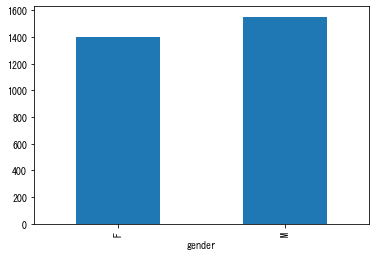

In [19]:
customer_newer.groupby("gender").count()["customer_id"].plot(kind="bar")

退会者込みと、非退会者のみで比率の差は見えてこないので、特定のグループが多く退会しているという事は無さそう

## 情報の追加

In [20]:
use_log

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [21]:
use_log["usedate"] = pd.to_datetime(use_log["usedate"])
use_log

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [22]:
use_log["年月"] = use_log["usedate"].dt.strftime("%Y%m")
use_log

,log_id,customer_id,usedate,年月
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [23]:
# 特定の年月&customer_idでグルーピング
use_log_month = use_log.groupby(["年月","customer_id"],as_index=False).count()
use_log_month

,年月,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [24]:
use_log_month.rename(columns={"log_id":"count"},inplace=True)
use_log_month

,年月,customer_id,count,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [25]:
del use_log_month["usedate"]

In [26]:
use_log_month

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [27]:
# 各ユーザーの利用状況(月単位)
use_log_customer = use_log_month.groupby("customer_id").agg(["mean","median","max","min"])["count"]
use_log_customer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


In [28]:
use_log_customer = use_log_customer.reset_index(drop=False)
use_log_customer

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


<AxesSubplot:>

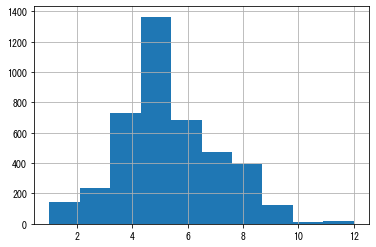

In [29]:
use_log_customer["mean"].hist()

<AxesSubplot:>

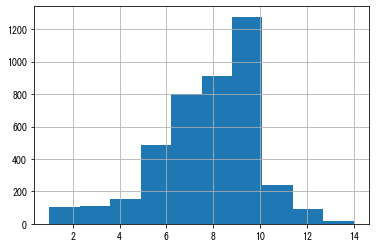

In [30]:
use_log_customer["max"].hist()

<AxesSubplot:>

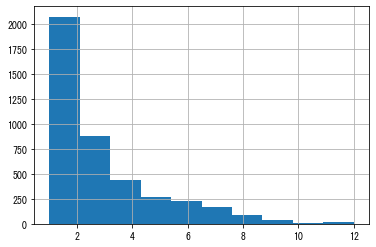

In [31]:
use_log_customer["min"].hist()

## 定期利用しているユーザーを抽出

In [32]:
use_log

,log_id,customer_id,usedate,年月
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [33]:
use_log["weekday"] = use_log["usedate"].dt.weekday
use_log["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [34]:
use_log_weekday = use_log.groupby(["customer_id","年月","weekday"],as_index=False).count()[["customer_id","年月","weekday","log_id"]]
use_log_weekday

,customer_id,年月,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [35]:
use_log_weekday.rename(columns={"log_id":"count"},inplace=True)
use_log_weekday

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [36]:
# 各ユーザごとに利用回数の最大値を抽出
use_log_max_count = use_log_weekday.groupby(["customer_id"],as_index=False).max()[["customer_id","count"]]
use_log_max_count

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [37]:
# 各月4回以上(週一回以上とみなす)来ている人を習慣づいた人として定義する
use_log_max_count["routing_flag"] = 0
# whereは、条件を満たすものはそのまま、満たさない者は指定した値で変更する
use_log_max_count["routing_flag"] = use_log_max_count["routing_flag"].where(use_log_max_count["count"]<4,1)
use_log_max_count

,customer_id,count,routing_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


## データの結合

In [38]:
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,start_month_str
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,通常,ナイト,6000,201505
...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,通常,ナイト,6000,201903
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903


In [39]:
use_log_max_count

,customer_id,count,routing_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


In [40]:
customer_join = pd.merge(customer_join,use_log_max_count,on="customer_id",how="left")
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,start_month_str,count,routing_flag
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505,4,1
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505,5,1
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505,5,1
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505,5,1
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,通常,ナイト,6000,201505,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903,3,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903,3,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,通常,ナイト,6000,201903,2,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903,3,0


In [41]:
customer_join = pd.merge(customer_join,use_log_customer,on="customer_id",how="left")
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,start_month_str,count,routing_flag,mean,median,max,min
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505,4,1,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505,5,1,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505,5,1,4.583333,5.0,6,3
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201505,5,1,4.833333,4.5,7,2
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,通常,ナイト,6000,201505,5,1,3.916667,4.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903,3,0,8.000000,8.0,8,8
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903,3,0,10.000000,10.0,10,10
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,通常,ナイト,6000,201903,2,0,8.000000,8.0,8,8
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,通常,オールタイム,10500,201903,3,0,11.000000,11.0,11,11


In [42]:
customer_join.isna().sum()

customer_id           0
name                  0
class                 0
gender                0
start_date            0
end_date           2842
campaign_id           0
is_deleted            0
campaign_name         0
class_name            0
price                 0
start_month_str       0
count                 0
routing_flag          0
mean                  0
median                0
max                   0
min                   0
dtype: int64

## 会員期間の計算

In [43]:
# relativedeltaは日付の差分を計算するライブラリ
from dateutil.relativedelta import relativedelta

customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_join["membership_period"] = 0

In [44]:
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i],customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join

c:\users\box16\desktop\data_analysis_practice\venv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,start_month_str,count,routing_flag,mean,median,max,min,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,201505,4,1,4.833333,5.0,8,2,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,201505,5,1,5.083333,5.0,7,3,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,201505,5,1,4.583333,5.0,6,3,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,201505,5,1,4.833333,4.5,7,2,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,通常,ナイト,6000,201505,5,1,3.916667,4.0,6,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,通常,オールタイム,10500,201903,3,0,8.000000,8.0,8,8,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,通常,オールタイム,10500,201903,3,0,10.000000,10.0,10,10,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,通常,ナイト,6000,201903,2,0,8.000000,8.0,8,8,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,通常,オールタイム,10500,201903,3,0,11.000000,11.0,11,11,2019-04-30,1


## 統計量

In [45]:
customer_join[["mean","median","max","min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


<AxesSubplot:xlabel='routing_flag'>

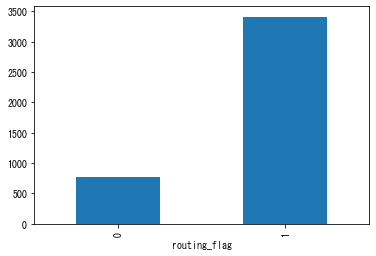

In [46]:
customer_join.groupby(["routing_flag"]).count()["customer_id"].plot(kind="bar")

<AxesSubplot:>

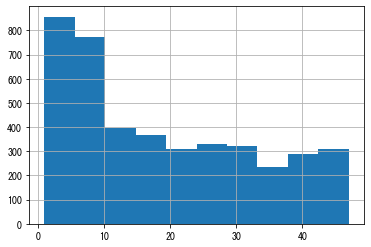

In [47]:
customer_join["membership_period"].hist()

## 退会者と非退会者の違いを知る

In [48]:
end_user = customer_join.loc[customer_join["is_deleted"]==1]
end_user

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,start_month_str,count,routing_flag,mean,median,max,min,calc_date,membership_period
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,通常,オールタイム,10500,201605,3,0,3.0,3.0,3,3,2018-04-30,23
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,通常,デイタイム,7500,201605,2,0,3.0,3.0,3,3,2018-04-30,23
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,通常,オールタイム,10500,201605,1,0,1.0,1.0,1,1,2018-04-30,23
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,通常,ナイト,6000,201606,4,1,3.5,3.5,4,3,2018-05-31,23
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,通常,オールタイム,10500,201606,2,0,3.0,3.0,3,3,2018-05-31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,OA143589,XXXXX,C03,F,2019-01-15,2019-02-28,CA1,1,通常,ナイト,6000,201901,2,0,4.5,4.5,6,3,2019-02-28,1
4050,GD367382,XXXX,C01,M,2019-01-15,2019-03-31,CA1,1,通常,オールタイム,10500,201901,2,0,7.0,6.0,12,3,2019-03-31,2
4068,OA034442,XXXXX,C02,M,2019-02-05,2019-03-31,CA1,1,通常,デイタイム,7500,201902,2,0,7.0,7.0,11,3,2019-03-31,1
4086,PL508278,XXXXX,C03,M,2019-02-09,2019-03-31,CA1,1,通常,ナイト,6000,201902,2,0,7.0,7.0,10,4,2019-03-31,1


In [49]:
stay_user = customer_join.loc[customer_join["is_deleted"]==0]
stay_user

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,start_month_str,count,routing_flag,mean,median,max,min,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,201505,4,1,4.833333,5.0,8,2,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,201505,5,1,5.083333,5.0,7,3,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,201505,5,1,4.583333,5.0,6,3,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,通常,オールタイム,10500,201505,5,1,4.833333,4.5,7,2,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,通常,ナイト,6000,201505,5,1,3.916667,4.0,6,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,通常,オールタイム,10500,201903,3,0,8.000000,8.0,8,8,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,通常,オールタイム,10500,201903,3,0,10.000000,10.0,10,10,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,通常,ナイト,6000,201903,2,0,8.000000,8.0,8,8,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,通常,オールタイム,10500,201903,3,0,11.000000,11.0,11,11,2019-04-30,1


In [50]:
end_user.describe()

,is_deleted,price,count,routing_flag,mean,median,max,min,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.215556,0.456296,3.865474,3.621852,6.461481,1.821481,8.026667
std,0.0,1949.163652,1.217087,0.498271,1.246385,1.270847,2.584021,0.976361,5.033692
min,1.0,6000.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,6000.000000,2.000000,0.000000,3.000000,3.000000,4.000000,1.000000,4.000000
50%,1.0,7500.000000,3.000000,0.000000,4.000000,4.000000,7.000000,2.000000,7.000000
75%,1.0,10500.000000,4.000000,1.000000,4.666667,4.500000,8.000000,2.000000,11.000000
max,1.0,10500.000000,5.000000,1.000000,9.000000,9.000000,13.000000,8.000000,23.000000


In [51]:
stay_user.describe()

,is_deleted,price,count,routing_flag,mean,median,max,min,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,4.865588,0.984166,6.030288,6.024279,8.471147,3.620690,23.970443
std,0.0,1977.189779,0.406154,0.124855,1.553587,1.599765,1.571048,2.030488,13.746761
min,0.0,6000.000000,2.000000,0.000000,3.166667,3.000000,5.000000,1.000000,1.000000
25%,0.0,6000.000000,5.000000,1.000000,4.833333,5.000000,7.000000,2.000000,12.000000
50%,0.0,7500.000000,5.000000,1.000000,5.583333,5.500000,8.000000,3.000000,24.000000
75%,0.0,10500.000000,5.000000,1.000000,7.178030,7.000000,10.000000,5.000000,35.000000
max,0.0,10500.000000,5.000000,1.000000,12.000000,12.000000,14.000000,12.000000,47.000000


利用回数の少なさが退会する/しないの分かれ目のような気がする  
退会者はすぐに退会する

In [52]:
customer_join.to_csv("customer_join.csv",index=False)